# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: Conheça o Google Colab e o Projeto Desta Dev Week

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [20]:
"""
Este código baixa um arquivo CSV de feedbacks do Google Drive e carrega os dados em um DataFrame pandas.

O arquivo é identificado por um ID único ('file_id'), que é extraído da URL do arquivo no Google Drive.
A URL do arquivo no Google Drive tem o seguinte formato:

"""

import gdown
import pandas as pd

file_id = "1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "feedbacks.csv")

dados = pd.read_csv('feedbacks.csv', delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi
To: c:\Users\filip\Desktop\devWeek\feedbacks.csv
100%|██████████| 351/351 [00:00<00:00, 351kB/s]


In [21]:
#       Código Versão 1 (Paradigma Imperativo).

"""
Versão 1: Paradigma Imperativo.

Este script lê um arquivo CSV contendo feedback de usuários, no qual cada feedback tem uma nota associada.
O NPS é calculado como a diferença entre o percentual de promotores (nota >= 9) e detratores (nota <= 6), multiplicada por 100.
A implementação é realizada de uma maneira imperativa, onde os comandos são executados sequencialmente.
"""


notas = dados['nota']

detratores = 0
promotores = 0

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100

print(nps)

57.14285714285714


In [22]:
#       Código Versão 2 (Paradigma Funcional).

"""
Versão 2: Paradigma Funcional.

Este código segue uma abordagem funcional para calcular o NPS a partir dos dados de feedback.
A função "calcular_nps" é definida para encapsular a lógica do cálculo do NPS. Esta versão apresenta
uma separação de responsabilidades mais clara do que a versão imperativa, além de melhorias de código pontuais.
"""


def calcular_nps(notas):
    detratores = sum(notas.apply(lambda nota: nota <= 6))
    promotores = notas[notas >= 9].count()

    return (promotores - detratores) / len(notas) * 100


nps = calcular_nps(notas)

print(nps)

57.14285714285714


In [23]:
#       Código Versão 3 (Paradigma Orientado a Objetos).

"""Este script adota uma abordagem Orientada a Objetos (OO) para calcular o NPS a partir de feedback de usuários.
Duas classes são definidas, onde:
- Feedback representa um único feedback de usuário;
- AnalisadorFeedback é usado para calcular o NPS a partir de uma lista de Feedbacks.
A POO fornece uma abstração mais clara dos dados e comportamentos envolvidos no cálculo do NPS.
Desta forma, nossa solução estará preparada para as evoluções do nosso projeto."""


class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario


class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    #  Por ser uma list do Python, aplicamos o conceito de "list comprehension" para filtrar nossos Feedbacks.
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    return (promotores - detratores) / len(self.feedbacks) * 100

feedbacks = [Feedback(linha['nota'], linha['comentario'])  for i, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
analisador.calcular_nps()

57.14285714285714

## Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

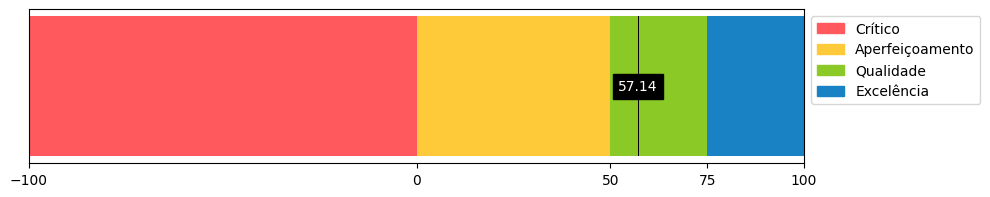

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS

NPS_ZONAS = ["Crítico", "Aperfeiçoamento", "Qualidade", "Excelência"]
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES = ["#FF595E", "#FFCA3A", "#8AC926", "#1982C4"]

def criar_grafico_nps(nps):
    fig, ax = plt.subplots(figsize=(10, 2))

    for i, zona in enumerate(NPS_ZONAS):
      ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i]) # valores do NPS 
      
      ax.barh([0], width=0.3, left=nps, color='black') # mostra barra onde se inicia o NPS
      ax.set_yticks([]) # Retira informações desnecessarias no eixo Y
      ax.set_xlim(-100, 100) # Delimitando o gráfico no eixo X
      ax.set_xticks(NPS_VALORES) # Colocando os valores reais do NPS no eixo X
      
      
    plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black')) # Adicionando o valor do NPS gráfico
    
    patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]  
    plt.legend(handles=patches, bbox_to_anchor=(1,1))  #Adicionado as legentas
    
    
    plt.show()

criar_grafico_nps(nps)



## Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.